# Part 1) Load the data and make a datetime index.

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import datetime

import missingno as miss

import seaborn as sns
import numpy as np

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [112]:
def format_xdates(ax):
    
    # Create a year locator
    loc_major_yr = mdates.YearLocator()
    # Create a year formatter using 4-digit years
    fmt_major_yr = mdates.DateFormatter("%Y")


    # Create a month locator that will add months at 1,4,7,10
    loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])
    # Createa monthnformatter that will use 3-letter month names
    fmt_minor_3m = mdates.DateFormatter("%b")
    

    
    # Set xaxis major locator/formatter
    ax.xaxis.set_major_locator(loc_major_yr)
    ax.xaxis.set_major_formatter(fmt_major_yr)


    # Set xaxis minor locator/formatter
    ax.xaxis.set_minor_locator(loc_minor_3m)
    ax.xaxis.set_minor_formatter(fmt_minor_3m)

    

    # Add gridlines for major xaxis ticks
    ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

    ## Rotate the major tick years using fig.autofmt_xdate
    fig = ax.get_figure()
    fig.autofmt_xdate(which='major', rotation=90,ha='center')
    return fig

In [113]:
# Define the file path with the correct name and extension
file_path = r'D:\Github\Repos\-Core--Resampling-Datetime-Data\Data\Modified Dataset.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path)

df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


In [114]:
df['date'][0]

19790101

In [115]:
today_datetime = datetime.datetime.today()
fmt = "%Y%m%d"
today_datetime.strftime(fmt)

'20231026'

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [117]:
# Convert the 'date' column to a datetime dtype
df['date'] = pd.to_datetime(df['date'], format=fmt)

In [118]:
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
15337,2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
15338,2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN
15339,2020-12-30,6.00,0.40,22.00,5.60,2.70,-0.10,0.00,"100,200.00",NaN


In [119]:
# Set the 'date' column as the index
df.set_index('date', inplace=True)

In [120]:
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN


In [121]:
df = df.loc[df.index.year > 2000, ['precipitation','mean_temp','min_temp','max_temp','snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2001-01-01,3.20,5.30,-0.50,10.80,0.00
2001-01-02,3.40,9.90,9.00,10.50,0.00
2001-01-03,8.00,7.00,3.50,9.40,0.00
2001-01-04,4.60,6.60,3.70,7.60,0.00
2001-01-05,0.00,7.20,6.70,8.50,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,NaN
2020-12-28,0.20,1.10,-1.30,3.60,NaN
2020-12-29,0.00,2.60,1.10,4.10,NaN


In [122]:
df['precipitation'].interpolate(method='linear', inplace=True)

In [123]:
df['mean_temp'].fillna(df['mean_temp'].mean(), inplace=True)

In [124]:
df['min_temp'].fillna(method='ffill', inplace=True)

C:\Users\verya\AppData\Local\Temp\ipykernel_18236\484717555.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['min_temp'].fillna(method='ffill', inplace=True)


In [125]:
df['max_temp'].fillna(method='ffill', inplace=True)

C:\Users\verya\AppData\Local\Temp\ipykernel_18236\46772711.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['max_temp'].fillna(method='ffill', inplace=True)


In [126]:
df['snow_depth'].interpolate(method='linear', inplace=True)

In [127]:
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2001-01-01,3.20,5.30,-0.50,10.80,0.00
2001-01-02,3.40,9.90,9.00,10.50,0.00
2001-01-03,8.00,7.00,3.50,9.40,0.00
2001-01-04,4.60,6.60,3.70,7.60,0.00
2001-01-05,0.00,7.20,6.70,8.50,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,0.00
2020-12-28,0.20,1.10,-1.30,3.60,0.00
2020-12-29,0.00,2.60,1.10,4.10,0.00


In [128]:
df.isnull().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

## Q1: What month had the most precipitation between 2000 through 2010?

In [129]:
df = df['2000':'2010']

In [130]:
# Resample to monthly and sum up the precipitation values
monthly_precipitation = df['precipitation'].resample('M').sum()


In [131]:
# Find the month with max precipitation
max_date = monthly_precipitation.idxmax()
max_value = monthly_precipitation[max_date]


<Axes: xlabel='date'>

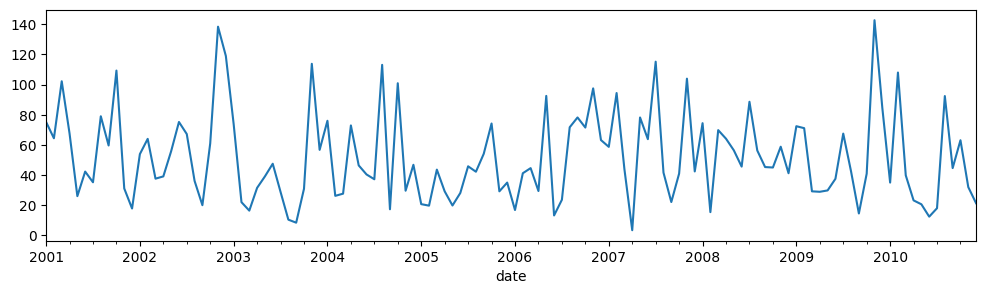

In [144]:
# Create the plot
fig, ax = plt.subplots(figsize=(12,3))
monthly_precipitation.plot(ax=ax,)


In [145]:
monthly_precipitation.idxmax()

Timestamp('2009-11-30 00:00:00')

In [147]:
# Create a year locator
loc_major_yr = mdates.YearLocator()

# Create a year formatter using 4-digit years
fmt_major_yr = mdates.DateFormatter("%Y")

# Create a month locator that will add months at 1,4,7,10
loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])

# Createa monthnformatter that will use 3-letter month names
fmt_minor_3m = mdates.DateFormatter("%b")

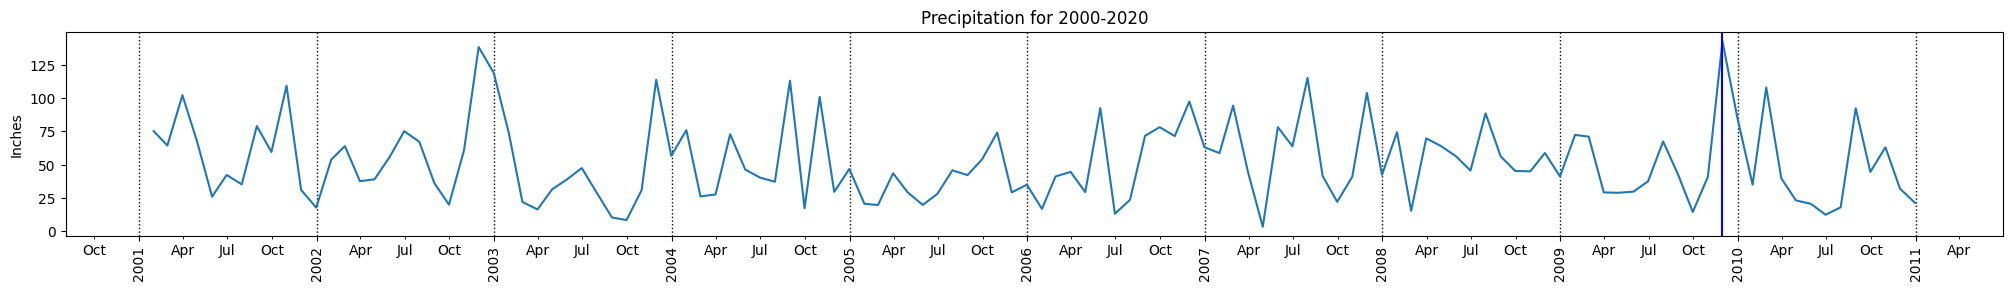

In [148]:
## Create the figure and axis
fig, ax = plt.subplots(figsize=(25,3))
ax.plot(monthly_precipitation)
## Format the xticks
format_xdates(ax)
ax.set_title('Precipitation for 2000-2020')
ax.set_ylabel('Inches')
# Set xaxis major locator/formatter
ax.xaxis.set_major_locator(loc_major_yr)
ax.xaxis.set_major_formatter(fmt_major_yr)

# Set xaxis minor locator/formatter
ax.xaxis.set_minor_locator(loc_minor_3m)
ax.xaxis.set_minor_formatter(fmt_minor_3m)

# Finding max precipitation value
max_precipitation_date = monthly_precipitation.idxmax()
max_precipitation_value = monthly_precipitation.max()

## Plot the data
fig = ax.get_figure()
plt.axvline(x=max_precipitation_date, color='b')
fig.autofmt_xdate(which='major', rotation=90,ha='center')

## Q2: Which year between 2000-2020 had the coolest average temperature?

In [152]:
# Resample to yearly and compute the mean for mean_temp
yearly_mean_temp = df['mean_temp'].resample('Y').mean()


In [153]:
# Find the year with the lowest mean_temp
min_date = yearly_mean_temp.idxmin()
min_value = yearly_mean_temp[min_date]


<Axes: xlabel='date'>

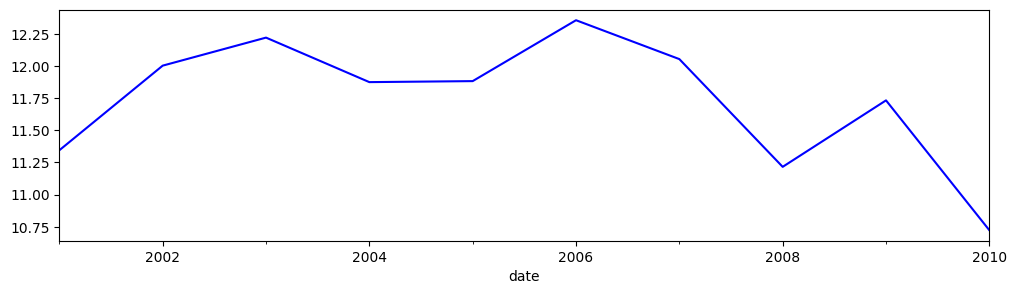

In [154]:
# Create the plot
fig, ax = plt.subplots(figsize=(12,3))
yearly_mean_temp.plot(ax=ax, label="Average Temperature", color="blue")


In [161]:
temp_ts = df.copy()
temp_ts = df.resample('Y').mean()['mean_temp']
temp_ts

date
2001-12-31   11.34
2002-12-31   12.00
2003-12-31   12.22
2004-12-31   11.87
2005-12-31   11.88
2006-12-31   12.36
2007-12-31   12.05
2008-12-31   11.22
2009-12-31   11.73
2010-12-31   10.72
Freq: A-DEC, Name: mean_temp, dtype: float64

In [162]:
loc_5year = mdates.YearLocator(base=5)
fmt_year = mdates.DateFormatter("%Y")
loc_minor_1year = mdates.YearLocator()
fmt_minor_1year = mdates.DateFormatter("%Y")

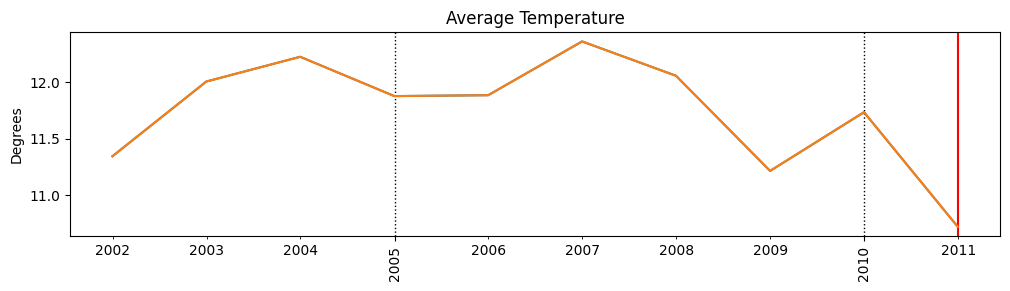

In [163]:
## Create the figure and axis
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(temp_ts)


## Format the xticks
format_xdates(ax)
ax.set_title('Average Temperature')
ax.set_ylabel('Degrees')

# major and minor formatter
ax.xaxis.set_major_locator(loc_5year)
ax.xaxis.set_major_formatter(fmt_year)

ax.xaxis.set_minor_locator(loc_minor_1year)
ax.xaxis.set_minor_formatter(fmt_minor_1year)

min_precipitation_date = temp_ts.idxmin()
min_precipitation_value = temp_ts.min()

ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

plt.axvline(x=min_precipitation_date, color='r')

## Plot the data
ax.plot(temp_ts);
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90,ha='center')